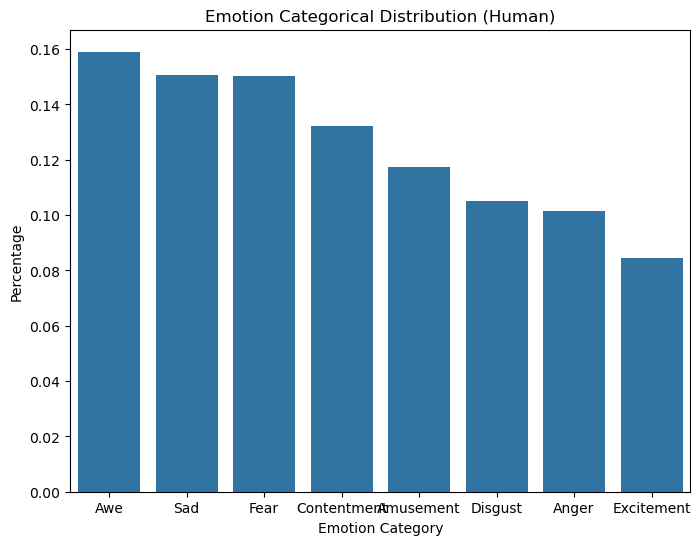

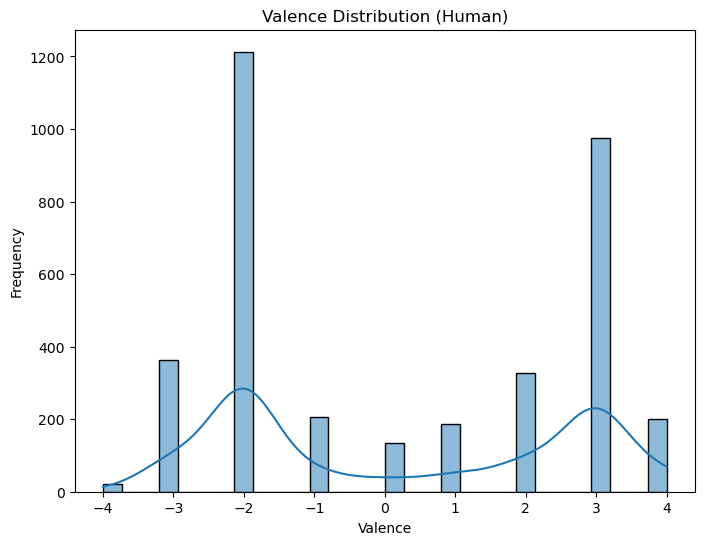

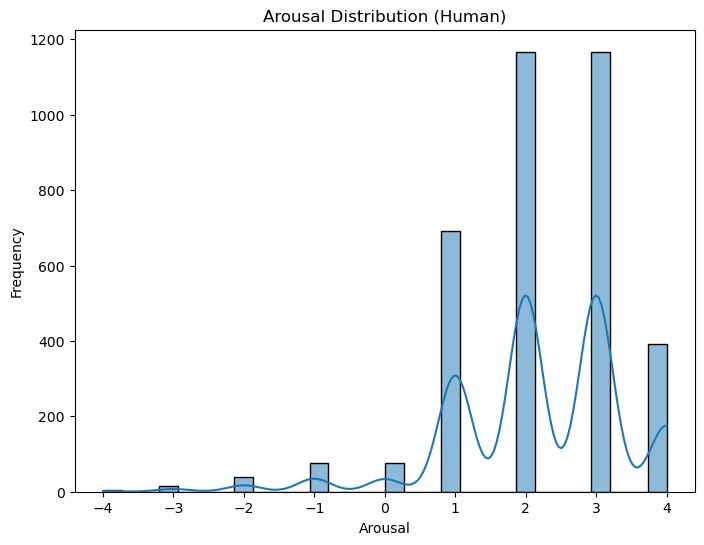

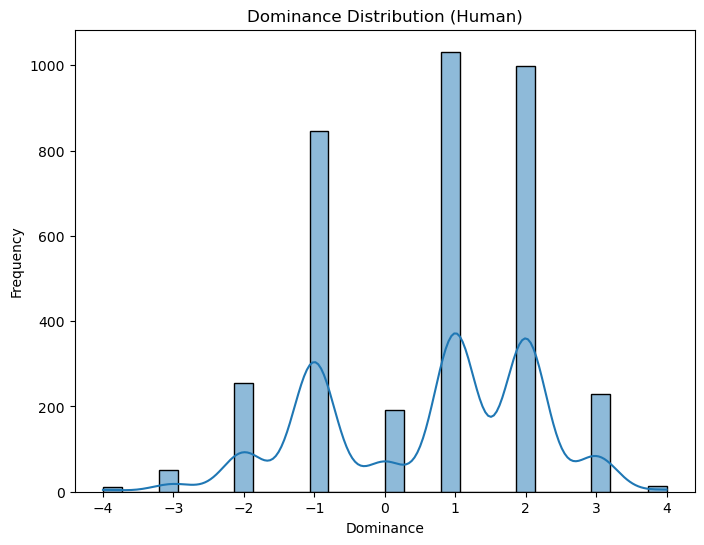

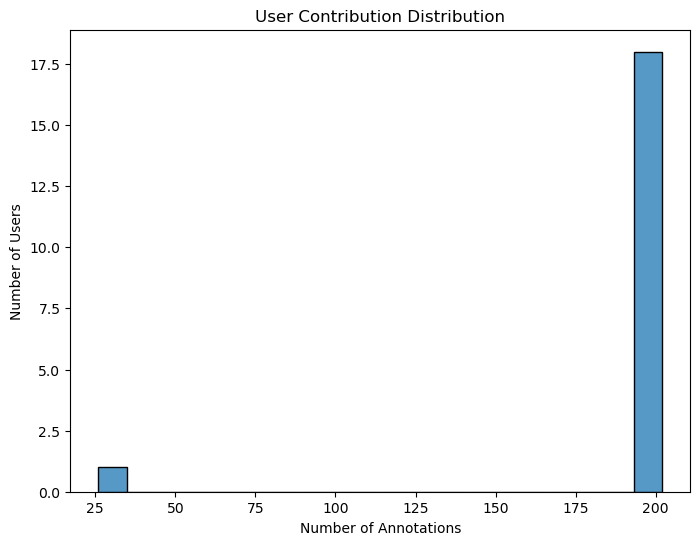

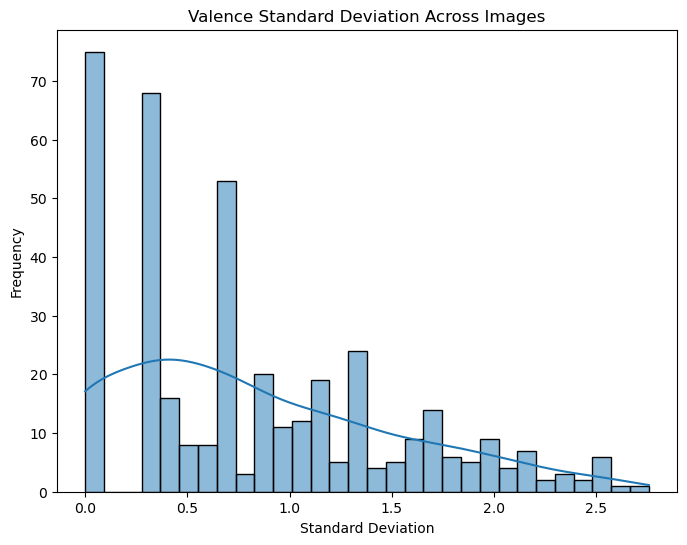

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取人类标注的CSV文件
human_labels = pd.read_csv("/home/pci/dong/emodb/dong/EmoGenDB/anno-backend/human_anno_label.csv")

# 1. 情绪类别分布
emotion_dist = human_labels['emotion_categorical'].value_counts(normalize=True)
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_dist.index, y=emotion_dist.values)
plt.title("Emotion Categorical Distribution (Human)")
plt.ylabel("Percentage")
plt.xlabel("Emotion Category")
plt.show()

# 2. Valence/Arousal/Dominance 分布
for col in ['valence', 'arousal', 'dominance']:
    plt.figure(figsize=(8, 6))
    sns.histplot(human_labels[col], bins=30, kde=True)
    plt.title(f"{col.capitalize()} Distribution (Human)")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.show()

# 3. 用户标注贡献
user_contribution = human_labels['user_id'].value_counts()
plt.figure(figsize=(8, 6))
sns.histplot(user_contribution, bins=20)
plt.title("User Contribution Distribution")
plt.xlabel("Number of Annotations")
plt.ylabel("Number of Users")
plt.show()

# 4. 标注一致性分析
std_valence = human_labels.groupby('img_name')['valence'].std()
plt.figure(figsize=(8, 6))
sns.histplot(std_valence, bins=30, kde=True)
plt.title("Valence Standard Deviation Across Images")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.show()


In [6]:
machine_labels_path = "/home/pci/dong/emodb/dong/AIGC-image/jouneryDB/all_cleaned_balanced25.csv"
machine_labels_path2 = "/home/pci/dong/emodb/dong/AIGC-image/MJ/all_cleaned_vicuna7b_balanced25.csv"
human_labels_path = "/home/pci/dong/emodb/dong/EmoGenDB/anno-backend/human_anno_label.csv"

# Read the machine-labeled CSV

machine_labels = pd.read_csv(machine_labels_path)
machine_labels2 = pd.read_csv(machine_labels_path2)
human_labels = pd.read_csv(human_labels_path)

# Ensure the necessary columns exist in both datasets
human_labels.rename(columns={'img_name': 'image_path'}, inplace=True)

# Select relevant columns from the machine-labeled data with a prefix
machine_columns = ['image_path', 'Emotion_Categorical', 'Valence', 'Arousal', 'Dominance']
machine_labels_selected = machine_labels[machine_columns].copy()
machine_labels_selected.rename(columns={
    'Emotion_Categorical': 'Machine_Emotion_Categorical',
    'Valence': 'Machine_Valence',
    'Arousal': 'Machine_Arousal',
    'Dominance': 'Machine_Dominance'
}, inplace=True)

machine_labels2_selected = machine_labels2[machine_columns].copy()
machine_labels2_selected.rename(columns={
    'Emotion_Categorical': 'Machine_Emotion_Categorical',
    'Valence': 'Machine_Valence',
    'Arousal': 'Machine_Arousal',
    'Dominance': 'Machine_Dominance'
}, inplace=True)


# Merge human and machine data
merged_labels = human_labels.merge(machine_labels_selected, on='image_path', how='inner')
merged_labels2 = human_labels.merge(machine_labels2_selected, on='image_path', how='inner')

# Save the new CSV with both human and machine labels
merged_labels.to_csv("merged_human_machine_labels.csv", index=False)
merged_labels2.to_csv("merged_human_machine_labels2.csv", index=False)




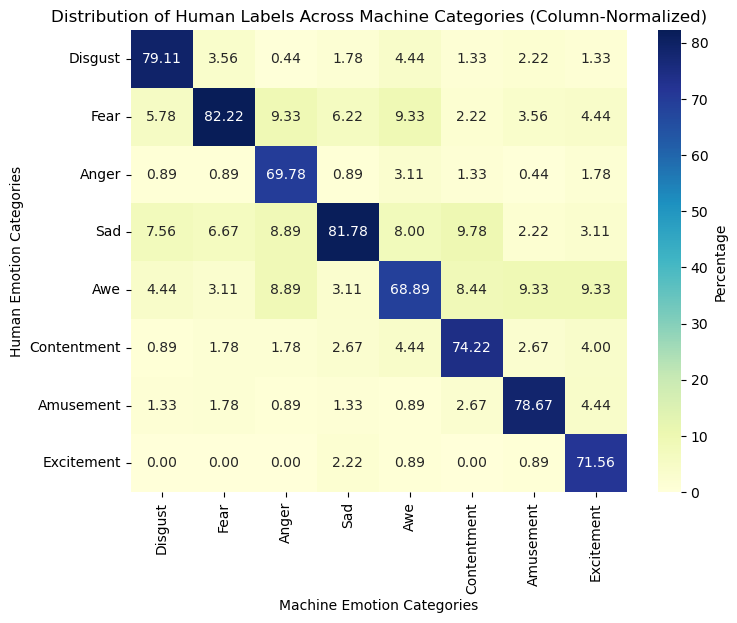

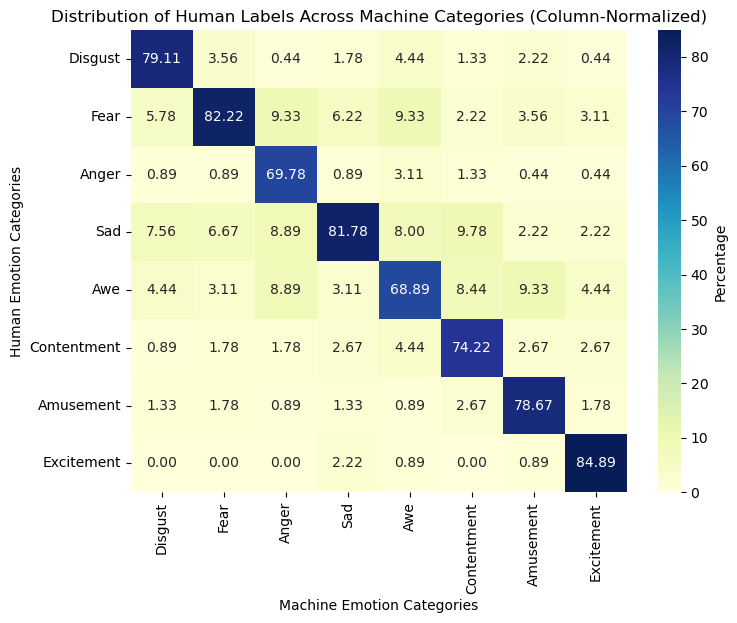

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_labels is already created
# Prepare data for plotting
# Assuming merged_labels is already available
# Recreate the grouped data for plotting
import pandas as pd

merged_labels = pd.read_csv("merged_human_machine_labels.csv")
merged_labels_updated = pd.read_csv("merged_human_machine_labels_updated.csv")
merged_labels2 = pd.read_csv("merged_human_machine_labels2.csv")

def plot_correlation_heatmap(merged_labels):
    
    plot_data = merged_labels.groupby(['Machine_Emotion_Categorical', 'emotion_categorical']).size().reset_index(name='count')

    # Pivot data for better visualization with X-axis as machine labels and Y-axis as human labels
    pivot_data = plot_data.pivot(index='emotion_categorical', columns='Machine_Emotion_Categorical', values='count').fillna(0)

    # Define the desired order for both axes
    label_order = ["Disgust", "Fear", "Anger", "Sad", "Awe", "Contentment", "Amusement", "Excitement"]

    # Reorder the pivot_data rows and columns to match the specified label order
    pivot_data_reordered = pivot_data.reindex(index=label_order, columns=label_order).fillna(0)

    # Convert counts to percentages
    # pivot_data_percentage_reordered = pivot_data_reordered.div(pivot_data_reordered.sum(axis=1), axis=0) * 100

    # 重新计算按列归一化的百分比
    pivot_data_percentage_reordered = pivot_data_reordered.div(pivot_data_reordered.sum(axis=0), axis=1) * 100

    # 绘制热力图
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pivot_data_percentage_reordered,
        annot=True,
        fmt=".2f",
        cmap="YlGnBu",
        cbar_kws={'label': 'Percentage'}
    )
    plt.title("Distribution of Human Labels Across Machine Categories (Column-Normalized)")
    plt.xlabel("Machine Emotion Categories")
    plt.ylabel("Human Emotion Categories")
    plt.show()

plot_correlation_heatmap(merged_labels)
plot_correlation_heatmap(merged_labels_updated)
# plot_correlation_heatmap(merged_labels2)

# # plot all the data
# aLL_merged_labels = pd.concat([merged_labels, merged_labels2])
# plot_correlation_heatmap(aLL_merged_labels)

/tmp/ipykernel_2404846/2373524444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data.rename(columns={
/tmp/ipykernel_2404846/2373524444.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
/tmp/ipykernel_2404846/2373524444.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)


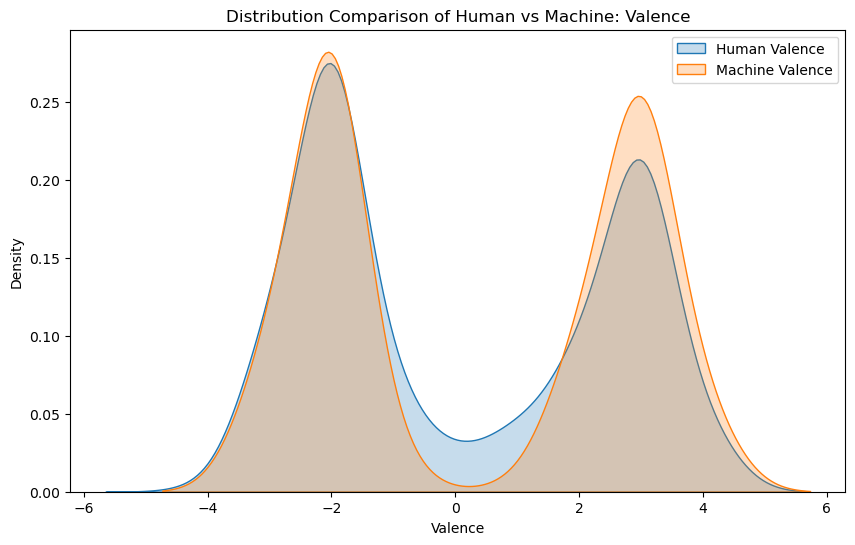

/tmp/ipykernel_2404846/2373524444.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
/tmp/ipykernel_2404846/2373524444.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)


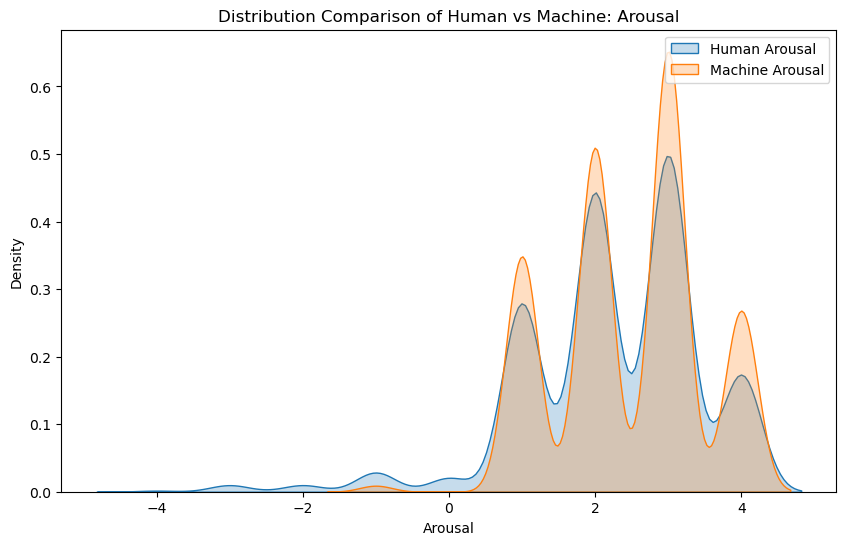

/tmp/ipykernel_2404846/2373524444.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
/tmp/ipykernel_2404846/2373524444.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)


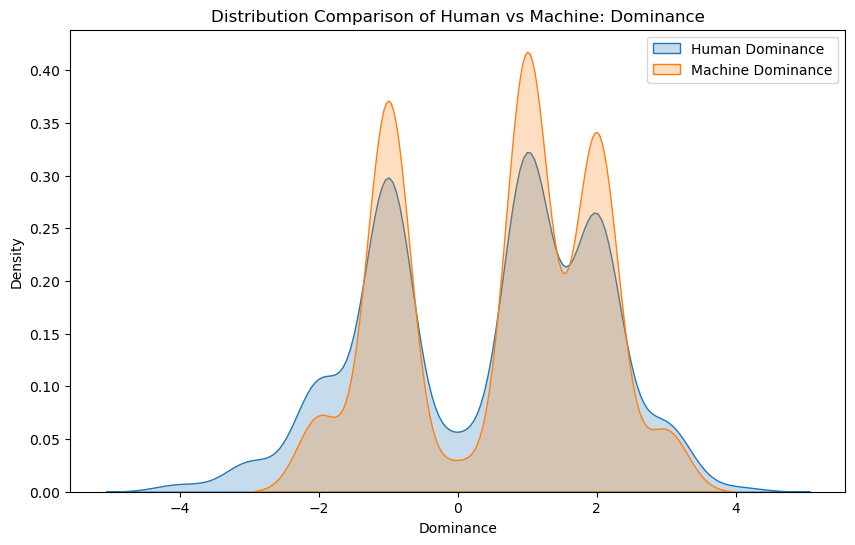

In [13]:
comparison_data = merged_labels[['valence', 'arousal', 'dominance', 
                                 'Machine_Valence', 'Machine_Arousal', 'Machine_Dominance']]

# Rename columns for clarity in visualization
comparison_data.rename(columns={
    'valence': 'Human_Valence',
    'arousal': 'Human_Arousal',
    'dominance': 'Human_Dominance',
    'Machine_Valence': 'Machine_Valence',
    'Machine_Arousal': 'Machine_Arousal',
    'Machine_Dominance': 'Machine_Dominance'
}, inplace=True)

# Plot comparisons for Valence, Arousal, and Dominance
for metric in ['Valence', 'Arousal', 'Dominance']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
    sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)
    plt.title(f"Distribution Comparison of Human vs Machine: {metric}")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Calculate and display basic statistics for each metric
stats = comparison_data.describe()

/tmp/ipykernel_1129030/812683451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comparison_data.rename(columns={
/tmp/ipykernel_1129030/812683451.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
/tmp/ipykernel_1129030/812683451.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)


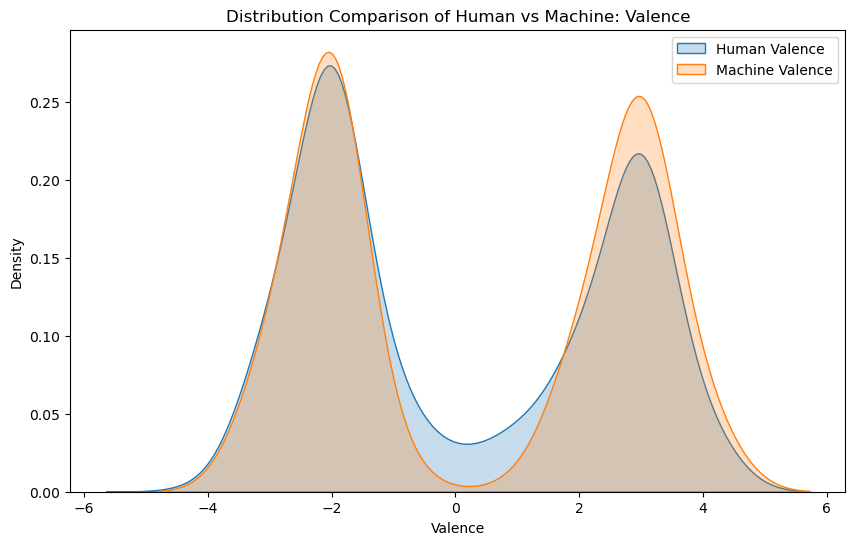

/tmp/ipykernel_1129030/812683451.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
/tmp/ipykernel_1129030/812683451.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)


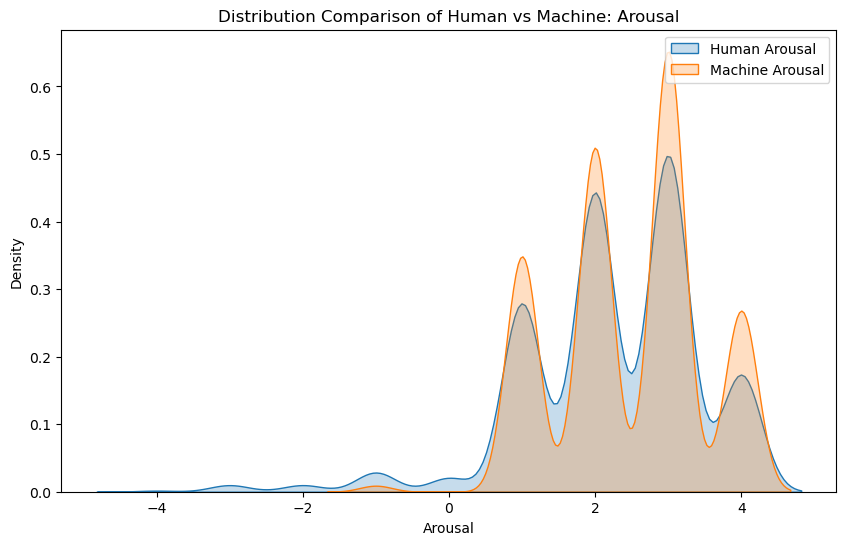

/tmp/ipykernel_1129030/812683451.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
/tmp/ipykernel_1129030/812683451.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)


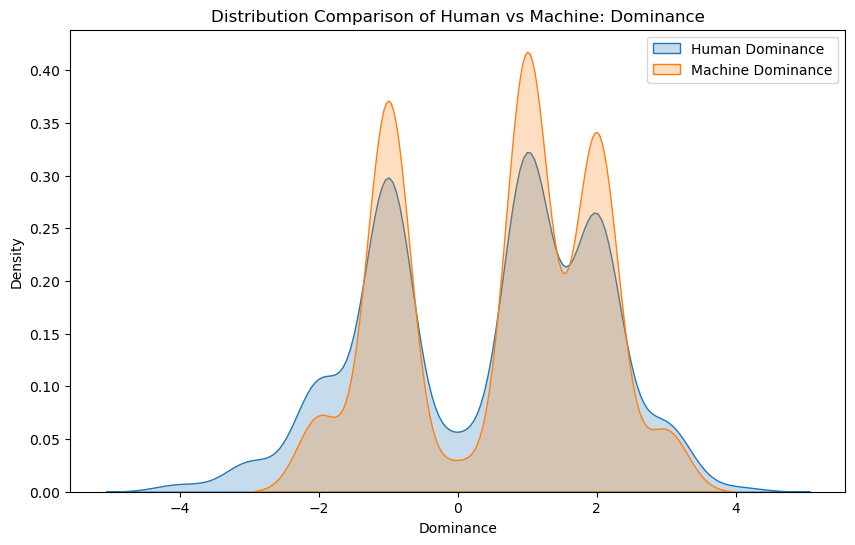

In [6]:
comparison_data = merged_labels_updated[['valence', 'arousal', 'dominance', 
                                 'Machine_Valence', 'Machine_Arousal', 'Machine_Dominance']]

# Rename columns for clarity in visualization
comparison_data.rename(columns={
    'valence': 'Human_Valence',
    'arousal': 'Human_Arousal',
    'dominance': 'Human_Dominance',
    'Machine_Valence': 'Machine_Valence',
    'Machine_Arousal': 'Machine_Arousal',
    'Machine_Dominance': 'Machine_Dominance'
}, inplace=True)

# Plot comparisons for Valence, Arousal, and Dominance
for metric in ['Valence', 'Arousal', 'Dominance']:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(comparison_data[f'Human_{metric}'], label=f'Human {metric}', shade=True)
    sns.kdeplot(comparison_data[f'Machine_{metric}'], label=f'Machine {metric}', shade=True)
    plt.title(f"Distribution Comparison of Human vs Machine: {metric}")
    plt.xlabel(metric)
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Calculate and display basic statistics for each metric
stats = comparison_data.describe()